In [149]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 150
from scipy.optimize import curve_fit

In [150]:
c_in = np.array([0,215,430,645,860,1080,1300,1510,1725,1940,2155,2370,2585,2800,3020,3230,3450,3665,3880,4095])
v_out = np.array([0.072,0.240,0.408,0.577,0.745,0.917,1.090,1.254,1.422,1.590,1.760,1.927,2.095,2.263,2.436,2.600,2.772,2.940,3.108,3.278])

In [151]:
def retta(x,m,c):
    return m*x+c

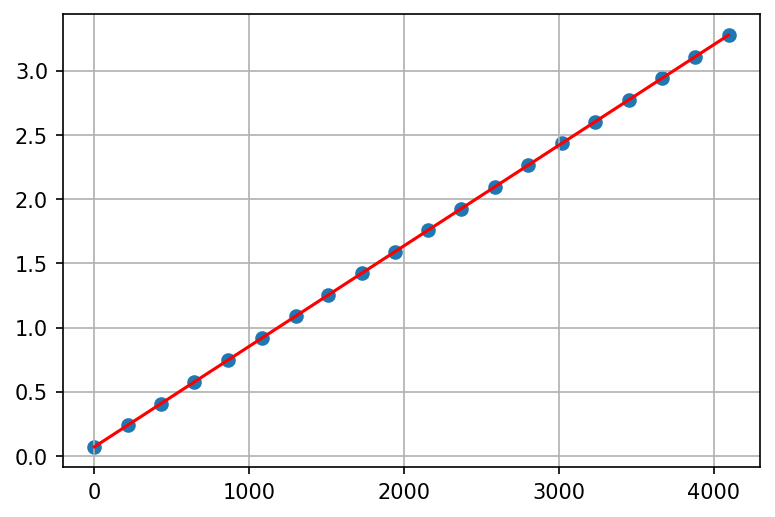

In [152]:
popt, cov = curve_fit(retta, c_in, v_out)
plt.plot(c_in, retta(c_in, popt[0], popt[1]), c="r")
plt.scatter(c_in, v_out)
plt.grid()

In [153]:
conti = np.array([30,32,46,48,226,441,655,860,1076,1282,1492,1698,1914,2134,2351,2547,2768,2977,3191,3407])
v_mis = np.array([0.0759,0.244,0.412,0.581,0.748,0.921,1.093,1.257,1.426,1.594,1.762,1.930,2.098,2.267,2.438,2.602,2.774,2.942,3.111,3.280])

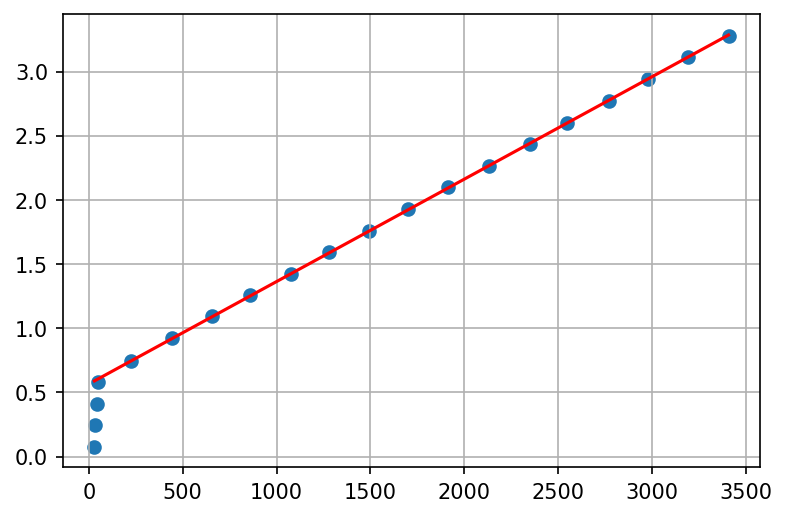

In [154]:
popt_ADC, cov_ADC = curve_fit(retta, conti[3:], v_mis[3:])
plt.plot(conti, retta(conti, popt_ADC[0], popt_ADC[1]), c="r")
plt.scatter(conti, v_mis)
plt.grid()

In [155]:
conti_2 = np.array([297,439,583,718,867,1018,1158,1304,1446,1592,1738,1886,2023,2169,2315,2460,2606,2750,2896,3036])
v_mis_2 = np.array([0.541,0.655,0.770,0.884,0.999,1.116,1.233,1.346,1.460,1.575,1.690,1.804,1.918,2.033,2.150,2.262,2.379,2.494,2.608,2.723])

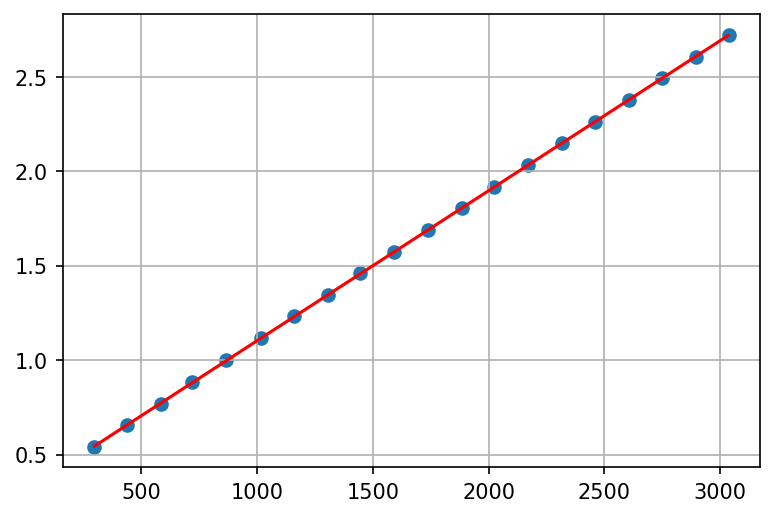

In [156]:
popt_ADC_2, cov_ADC_2 = curve_fit(retta, conti_2, v_mis_2)
plt.plot(conti_2, retta(conti_2, popt_ADC_2[0], popt_ADC_2[1]), c="r")
plt.scatter(conti_2, v_mis_2)
plt.grid()

In [157]:
sigmaV = lambda a: 0.03*a

In [158]:
def conv(x, step):
    return (x*step+step)*(-1)

In [159]:
popt, cov = curve_fit(retta, range(16), V_X, sigma=sigma_V_X)

NameError: name 'V_X' is not defined

In [ ]:
df_1 = pd.read_csv("File1.csv", delimiter=", ")
df_2 = pd.read_csv("File2.csv", delimiter=", ")
df_3 = pd.read_csv("sine1.csv", delimiter=", ")
df_4 = pd.read_csv("sine2.csv", delimiter=", ")
df_5 = pd.read_csv("trian1.csv", delimiter=", ")
df_6 = pd.read_csv("trian2.csv", delimiter=", ")


/home/rosso/.local/lib/python3.8/site-packages/pandas/util/_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)


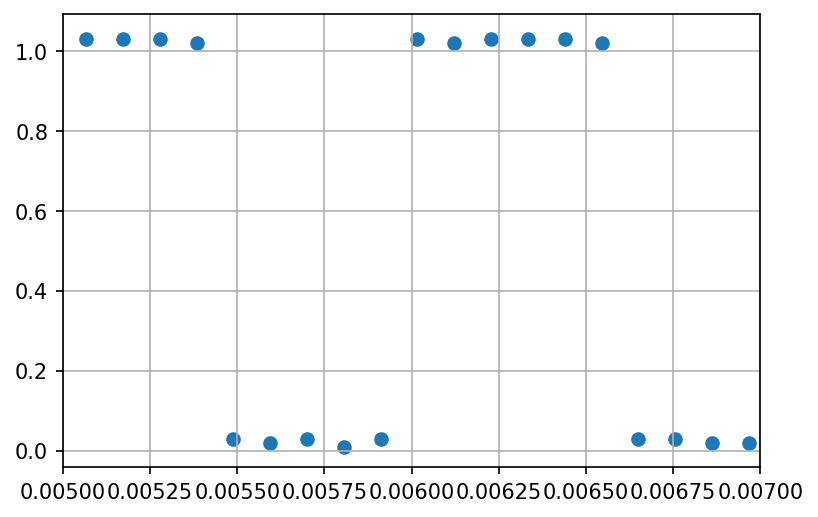

In [ ]:
t_1=np.arange(0,10556, 10556/len(df_1["V"]))*10**-6

plt.scatter(t_1, df_1["V"])
plt.xlim(0.005,0.007)
plt.grid()

In [ ]:
len(t_1)

681033

199
nu = 917.4311926605504 Hz


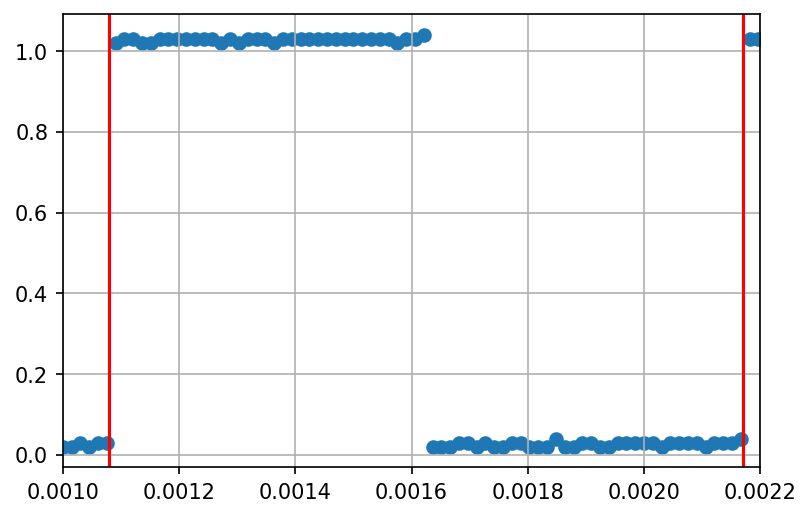

In [ ]:
t_2=np.arange(0,3030, 3030/len(df_2["V"]))*10**-6
print(len(df_2["V"][1:]))
plt.scatter(t_2, df_2["V"])
plt.xlim(0.001, 0.0022)
plt.axvline(0.00108, c="r")
plt.axvline(0.00217, c="r")
plt.grid()

print("nu = {} Hz".format( 1/(0.00217-0.00108) ))

In [ ]:
len(t_2)

303

nu = 925.9259259259259 Hz


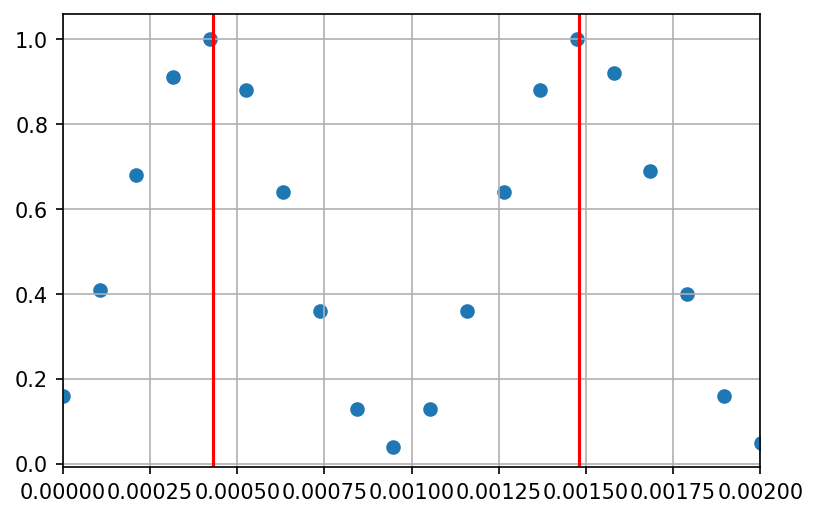

In [ ]:
t_3=np.arange(0,21063, 21063/len(df_3["V"]))*10**-6
plt.scatter(t_3, df_3["V"])
plt.xlim(0.00, 0.002)
plt.axvline(0.00148, c="r")
plt.axvline(0.00043, c="r")
plt.grid()
print("nu = {} Hz".format( 1/(0.00148-0.0004) ))

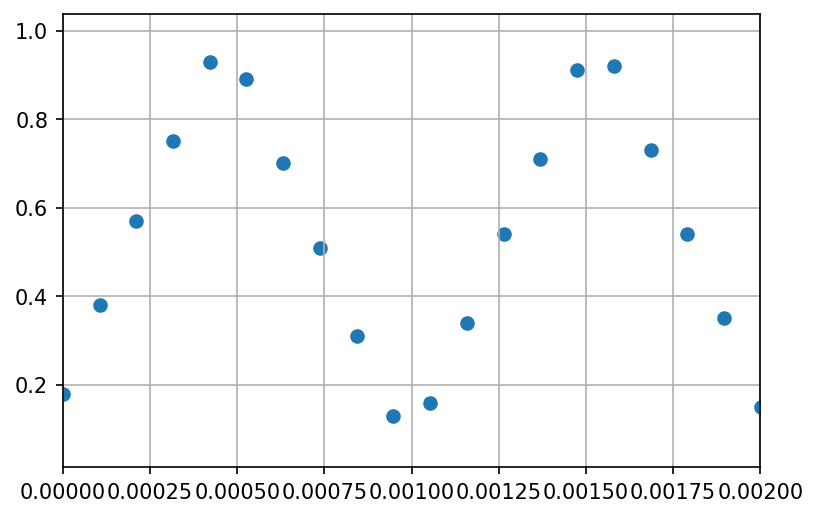

In [ ]:
t_5=np.arange(0,21064, 21064/len(df_5["V"]))*10**-6
plt.scatter(t_5, df_5["V"])
plt.xlim(0.0, 0.002)
plt.grid()

In [ ]:
def tabmaker(l):
    st = ""
    for i in range(len(l[0][1])):
        for j in range(len(l)):
            col = l[j]
            #print(col)
            st+="${}\pm{}$ & ".format(np.round(col[1][i], 4), np.round(col[0](col[1][i]), 2))
        st += " \\\ "
    return st


In [ ]:
print(tabmaker([(sigmaV, gradini*10**3)]))

$525.0\pm15.75$ &  \\ $575.0\pm17.25$ &  \\ $525.0\pm15.75$ &  \\ $262.5\pm7.88$ &  \\ $512.5\pm15.38$ &  \\ $575.0\pm17.25$ &  \\ $500.0\pm15.0$ &  \\ $687.5\pm20.62$ &  \\ $487.5\pm14.62$ &  \\ $562.5\pm16.88$ &  \\ $475.0\pm14.25$ &  \\ $312.5\pm9.38$ &  \\ $462.5\pm13.88$ &  \\ $562.5\pm16.88$ &  \\ $475.0\pm14.25$ &  \\ 


In [ ]:
print(tabmaker([(sigmaVV, V_X)]))

$-0.56\pm-0.02$ &  \\ $-1.02\pm-0.03$ &  \\ $-1.53\pm-0.05$ &  \\ $-2.05\pm-0.06$ &  \\ $-2.24\pm-0.07$ &  \\ $-2.69\pm-0.08$ &  \\ $-3.28\pm-0.1$ &  \\ $-3.84\pm-0.12$ &  \\ $-4.6\pm-0.14$ &  \\ $-4.98\pm-0.15$ &  \\ $-5.5\pm-0.16$ &  \\ $-6.21\pm-0.19$ &  \\ $-6.5\pm-0.2$ &  \\ $-6.98\pm-0.21$ &  \\ $-7.54\pm-0.23$ &  \\ $-8.03\pm-0.24$ &  \\ 
